<a href="https://colab.research.google.com/github/jeffvun/Bio-Informatics-Exercises/blob/main/Bayesian_Stats_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('rstan')
install.packages('tidyverse')
install.packages("remotes")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
remotes::install_github("stan-dev/bayesplot")

isoband   (0.2.6 -> 0.2.7   ) [CRAN]
plyr      (NA    -> 1.8.9   ) [CRAN]
tensorA   (NA    -> 0.36.2.1) [CRAN]
reshape2  (NA    -> 1.4.4   ) [CRAN]
posterior (NA    -> 1.5.0   ) [CRAN]


Installing 5 packages: isoband, plyr, tensorA, reshape2, posterior

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file ‘/tmp/RtmpEIR9fK/remotesebe7bfe8330/stan-dev-bayesplot-c97cd58/DESCRIPTION’ ... OK
* preparing ‘bayesplot’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘bayesplot_1.11.0.9000.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
# Load Required Packages
library(rstan)
library(tidyverse)
library(haven)
library(bayesplot)


Loading required package: StanHeaders


rstan version 2.32.5 (Stan version 2.32.2)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::extract() masks rstan::extract()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to for

In [4]:
#set seed for reproducibility
set.seed(123)

In [5]:
# Data Import
hospital_data <- read_dta("/content/hospital_at_home.dta")
summary(hospital_data)

      age            age_z              sex          intervention   
 Min.   :15.91   Min.   :-3.5455   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:57.25   1st Qu.:-0.7053   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :69.80   Median : 0.1565   Median :0.0000   Median :0.0000  
 Mean   :67.52   Mean   : 0.0000   Mean   :0.4815   Mean   :0.3968  
 3rd Qu.:78.50   3rd Qu.: 0.7547   3rd Qu.:1.0000   3rd Qu.:1.0000  
 Max.   :95.30   Max.   : 1.9085   Max.   :1.0000   Max.   :1.0000  
 length_of_stay   
 Min.   :  1.071  
 1st Qu.: 11.494  
 Median : 19.367  
 Mean   : 26.008  
 3rd Qu.: 32.103  
 Max.   :172.646  

In [6]:
# Model Specification
model_code <- "
data {
  int<lower=0> N;
  vector[N] age_z;
  int<lower=0, upper=1> male[N];
  int<lower=0, upper=1> intervention[N];
  vector[N] length_of_stay;
}
parameters {
  real beta0;
  real beta1;
  real beta2;
  real delta;
  real<lower=0> sigma;
}
model {
  beta0 ~ normal(0, 1);
  beta1 ~ normal(0, 1);
  beta2 ~ normal(0, 1);
  delta ~ normal(0, 1);
  sigma ~ cauchy(0, 1);

  for (i in 1:N) {
    length_of_stay[i] ~ normal(beta0 + beta1 * age_z[i] + beta2 * male[i] + delta * intervention[i], sigma);
  }
}
"


In [7]:
# Prepare data for Stan
stan_data <- list(
  N = nrow(hospital_data),
  age_z = hospital_data$age_z,
  male = hospital_data$sex,
  intervention = hospital_data$intervention,
  length_of_stay = hospital_data$length_of_stay
)


In [8]:
# Bayesian estimation
stan_model <- stan_model(model_code = model_code)
stan_fit <- sampling(stan_model, data = stan_data, chains = 4, iter = 1000)



SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000494 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 4.94 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Warmup)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Warmup)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Warmup)
Chain 1: Iteration: 501 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 2.556 seconds (Warm-up)
Chain 1:                0.856 seconds (Sampling)
Chain 1:                3.412 seconds 

In [9]:
# MCMC Diagnostics
print(stan_fit)


Inference for Stan model: anon_model.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

          mean se_mean   sd     2.5%      25%      50%      75%    97.5% n_eff
beta0    10.21    0.02 0.88     8.43     9.61    10.25    10.80    11.93  2265
beta1     2.50    0.02 0.75     1.01     1.98     2.50     2.99     3.96  2059
beta2     4.23    0.02 0.88     2.54     3.62     4.23     4.84     5.92  2336
delta     2.26    0.02 0.92     0.48     1.61     2.27     2.88     4.10  2056
sigma    26.78    0.02 0.90    25.13    26.15    26.74    27.36    28.65  2271
lp__  -2218.99    0.05 1.64 -2223.02 -2219.86 -2218.64 -2217.80 -2216.83  1039
      Rhat
beta0    1
beta1    1
beta2    1
delta    1
sigma    1
lp__     1

Samples were drawn using NUTS(diag_e) at Tue Feb  6 13:00:08 2024.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
converg

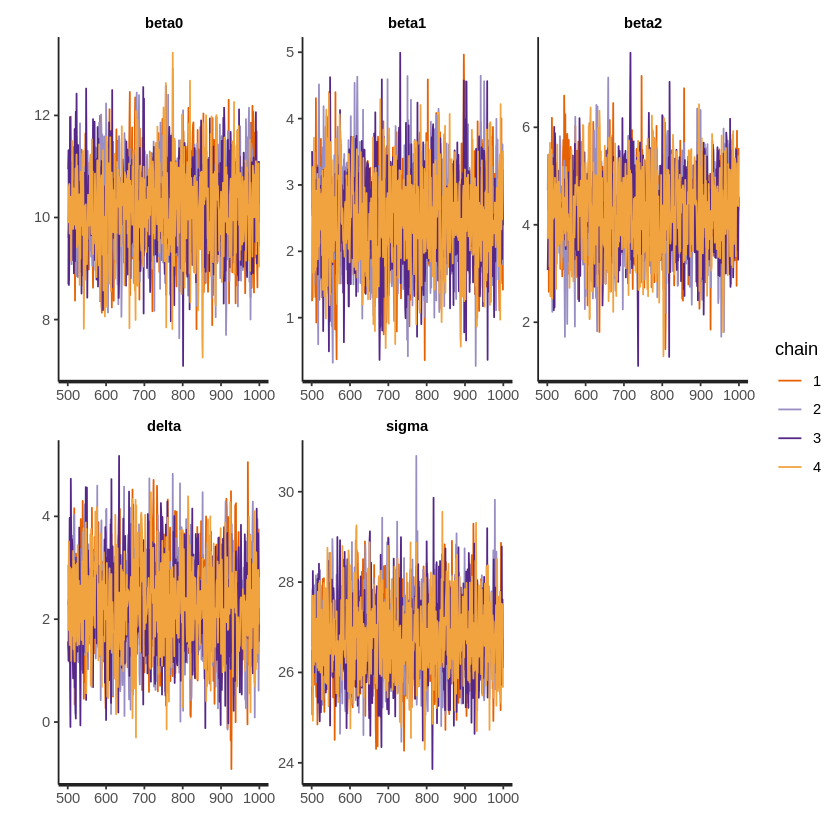

In [10]:
# Trace plots
traceplot(stan_fit)

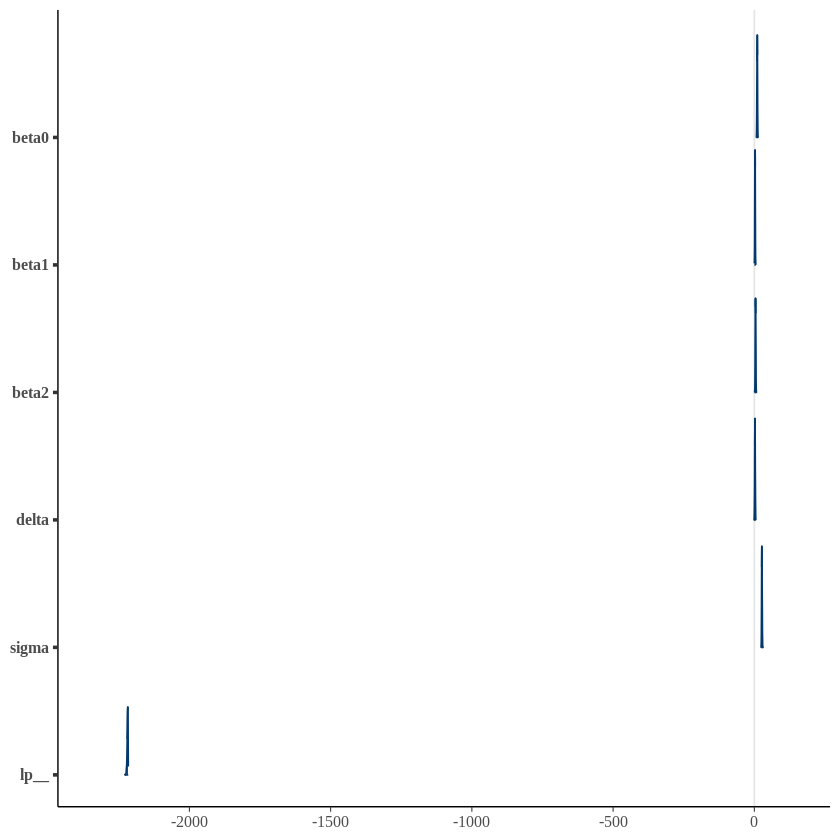

In [11]:
# Density plots
mcmc_areas(stan_fit)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


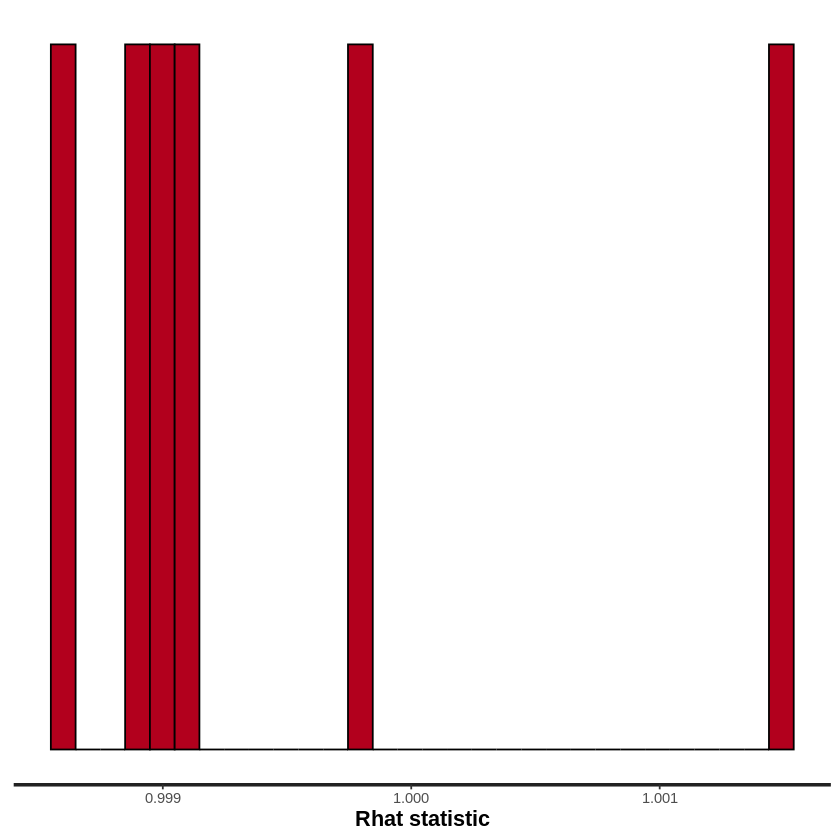

In [13]:
# Gelman-Rubin statistic
# Gelman-Rubin statistic (Rhat)
rhat_values <- stan_rhat(stan_fit)
print(rhat_values)

In [14]:
# Model Parameter Estimates
summary(stan_fit)


,mean,se_mean,sd,2.5%,25%,50%,75%,97.5%,n_eff,Rhat
beta0,10.208686,0.01859446,0.8849147,8.4345666,9.611941,10.248639,10.803067,11.929024,2264.829,0.9989365
beta1,2.496677,0.01661385,0.7538000,1.0060217,1.976788,2.502034,2.990145,3.959189,2058.598,0.9990145
beta2,4.231906,0.01826303,0.8826178,2.5352189,3.620233,4.227161,4.835338,5.920953,2335.606,1.0015375
delta,2.260692,0.02037776,0.9239179,0.4784912,1.608927,2.265969,2.878533,4.104027,2055.672,0.9991148
sigma,26.779884,0.01898049,0.9045061,25.1266404,26.149121,26.742810,27.362894,28.645616,2270.953,0.9986470
lp__,-2218.992127,0.05092671,1.6414863,-2223.0179549,-2219.862037,-2218.635822,-2217.797763,-2216.825746,1038.923,0.9998054


In [15]:
# Calculate per-patient net costs
cost_per_bed_day <- 350
per_patient_program_cost <- 20000
posterior_samples <- as.data.frame(stan_fit)
mean_difference <- mean(posterior_samples$sigma)

probability_cost_saving <- pnorm(0, mean_difference * cost_per_bed_day - per_patient_program_cost, sd(posterior_samples$sigma))
probability_cost_saving


[1] 1